In [21]:
import pandas as pd
import numpy as np

from Bio import SeqIO
from Bio import Entrez
import os

from Bio.Align.Applications import ClustalOmegaCommandline
from Bio import Phylo, AlignIO

from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio.Phylo import draw

import matplotlib.pyplot as plt

In [66]:
Entrez.email='simon.burgermeister@gmail.com'

## Genbank exploration:
<br>
<br>

###  RaTG13--Closest Wild relative (96.1 % sequence simmilarity):

<br>
<br>

In [2]:

ref_id='MN996532'


handle = Entrez.efetch(db='nucleotide', id=ref_id, rettype='gb')
print(handle.read())
handle.close()

LOCUS       MN996532               29855 bp    RNA     linear   VRL 24-NOV-2020
DEFINITION  Bat coronavirus RaTG13, complete genome.
ACCESSION   MN996532
VERSION     MN996532.2
KEYWORDS    .
SOURCE      Bat coronavirus RaTG13
  ORGANISM  Bat coronavirus RaTG13
            Viruses; Riboviria; Orthornavirae; Pisuviricota; Pisoniviricetes;
            Nidovirales; Cornidovirineae; Coronaviridae; Orthocoronavirinae;
            Betacoronavirus; Sarbecovirus.
REFERENCE   1  (bases 1 to 29855)
  AUTHORS   Zhou,P., Yang,X.-L., Wang,X.-G., Hu,B., Zhang,L., Zhang,W.,
            Si,H.-R., Zhu,Y., Li,B., Huang,C.-L., Chen,H.-D., Chen,J., Luo,Y.,
            Guo,H., Jiang,R.-D., Liu,M.-Q., Chen,Y., Shen,X.-R., Wang,X.,
            Zheng,X.-S., Zhao,K., Chen,Q.-J., Deng,F., Liu,L.-L., Yan,B.,
            Zhan,F.-X., Wang,Y.-Y., Xiao,G.-F. and Shi,Z.-L.
  TITLE     A pneumonia outbreak associated with a new coronavirus of probable
            bat origin
  JOURNAL   Nature 579 (7798), 270-273 (2020)

### Bat sample with S1- S2 subunit insertion:
<br>
<br>

In [3]:
ref_id='NC_045512'

handle = Entrez.efetch(db='nucleotide', id=ref_id, rettype='gb')
print(handle.read())
handle.close()

LOCUS       NC_045512              29903 bp ss-RNA     linear   VRL 18-JUL-2020
DEFINITION  Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1,
            complete genome.
ACCESSION   NC_045512
VERSION     NC_045512.2
DBLINK      BioProject: PRJNA485481
KEYWORDS    RefSeq.
SOURCE      Severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2)
  ORGANISM  Severe acute respiratory syndrome coronavirus 2
            Viruses; Riboviria; Orthornavirae; Pisuviricota; Pisoniviricetes;
            Nidovirales; Cornidovirineae; Coronaviridae; Orthocoronavirinae;
            Betacoronavirus; Sarbecovirus.
REFERENCE   1  (bases 1 to 29903)
  AUTHORS   Wu,F., Zhao,S., Yu,B., Chen,Y.M., Wang,W., Song,Z.G., Hu,Y.,
            Tao,Z.W., Tian,J.H., Pei,Y.Y., Yuan,M.L., Zhang,Y.L., Dai,F.H.,
            Liu,Y., Wang,Q.M., Zheng,J.J., Xu,L., Holmes,E.C. and Zhang,Y.Z.
  TITLE     A new coronavirus associated with human respiratory disease in
            China
  JOURNAL   Nature 579 (7

### First Human Sample (ref seq):
<br>
<br>

In [15]:
#ref_id='NC_045512'
#replaced by:
ref_id='MN908947'
Entrez.email='simon.burgermeister@gmail.com'


handle = Entrez.efetch(db='nucleotide', id=ref_id, rettype='gb')

print(handle.read())


LOCUS       MN908947               29903 bp ss-RNA     linear   VRL 18-MAR-2020
DEFINITION  Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1,
            complete genome.
ACCESSION   MN908947
VERSION     MN908947.3
KEYWORDS    .
SOURCE      Severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2)
  ORGANISM  Severe acute respiratory syndrome coronavirus 2
            Viruses; Riboviria; Orthornavirae; Pisuviricota; Pisoniviricetes;
            Nidovirales; Cornidovirineae; Coronaviridae; Orthocoronavirinae;
            Betacoronavirus; Sarbecovirus.
REFERENCE   1  (bases 1 to 29903)
  AUTHORS   Wu,F., Zhao,S., Yu,B., Chen,Y.M., Wang,W., Song,Z.G., Hu,Y.,
            Tao,Z.W., Tian,J.H., Pei,Y.Y., Yuan,M.L., Zhang,Y.L., Dai,F.H.,
            Liu,Y., Wang,Q.M., Zheng,J.J., Xu,L., Holmes,E.C. and Zhang,Y.Z.
  TITLE     A new coronavirus associated with human respiratory disease in
            China
  JOURNAL   Nature 579 (7798), 265-269 (2020)
   PUBMED   32015508
RE

## Phylo Tree:
<br>
<br>

In [41]:
lst_id=['MN908947', 'MN996532', 'MT121216', 'JQ065048', 'NC_034972', 'NC_019843']
lst_sp=['H. sapiens Sars-Cov-2', 'Rhinolophus affinis coronavirus (RaTG13)', 'Manis javanica coronavirus(MT121216)', 'Wigeon coronavirus', 'Rodent coronavirus', 'H. sapiens sars-cov-1']

lst_record=[]
for i, iid in enumerate(lst_id):
    print(iid)
    handle = Entrez.efetch(db='nucleotide', id=iid, rettype='gb')
    record = SeqIO.read(handle, "genbank")
    #print(record.description)
    print(record.annotations['source'])
    print(lst_sp[i])
    handle.close()
    lst_record.append(record)
    #record.annotations['taxonomy']
    #record.annotations['date']
    print(' ')
    
SeqIO.write(lst_record, "sequences/cov_sample.fasta", "fasta")

MN908947
Severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2)
H. sapiens Sars-Cov-2
 
MN996532
Bat coronavirus RaTG13
Rhinolophus affinis coronavirus (RaTG13)
 
MT121216
Pangolin coronavirus
Manis javanica coronavirus(MT121216)
 
JQ065048
Wigeon coronavirus HKU20
Wigeon coronavirus
 
NC_034972
Coronavirus AcCoV-JC34
Rodent coronavirus
 
NC_019843
Middle East respiratory syndrome-related coronavirus (MERS-CoV)
H. sapiens sars-cov-1
 


6

In [42]:
# Define input file
in_file = "sequences/cov_sample.fasta"

# Define output file
out_file = "sequences/cov_sample_aligned.fasta"

# Get the command for Clustal Omega
###sudo apt-get install -y clustalo
clustalomega_cline = ClustalOmegaCommandline(infile=in_file, outfile=out_file, verbose=True, auto=True,  force=True)

# Print the executable command
print(clustalomega_cline)
clustalomega_cline()

clustalo -i sequences/cov_sample.fasta -o sequences/cov_sample_aligned.fasta --auto -v --force


('Using 8 threads\nRead 6 sequences (type: DNA) from sequences/cov_sample.fasta\nnot more sequences (6) than cluster-size (100), turn off mBed\nSetting options automatically based on input sequence characteristics (might overwrite some of your options).\nAuto settings: Enabling mBed.\nAuto settings: Setting iteration to 1.\nUsing 5 seeds (chosen with constant stride from length sorted seqs) for mBed (from a total of 6 sequences)\nCalculating pairwise ktuple-distances...\nKtuple-distance calculation progress: 0 % (0 out of 20)\nKtuple-distance calculation progress: 10 % (2 out of 20)\nKtuple-distance calculation progress: 20 % (4 out of 20)\nKtuple-distance calculation progress done. CPU time: 4.35u 0.00s 00:00:04.34 Elapsed: 00:00:01\nmBed created 1 cluster/s (with a minimum of 1 and a soft maximum of 100 sequences each)\nDistance calculation within sub-clusters: 0 % (0 out of 1)\nDistance calculation within sub-clusters done. CPU time: 4.30u 0.00s 00:00:04.30 Elapsed: 00:00:02\nGuide-

In [43]:
align = AlignIO.read("sequences/cov_sample_aligned.fasta", "fasta")
print(align)

calculator = DistanceCalculator('identity')
dm = calculator.get_distance(align)

Alignment with 6 rows and 36726 columns
--------------------------------------------...AAA MN908947.3
--------------------------------------------...--- MN996532.2
--------------------------------------------...--- MT121216.1
-----------------------------------GTCATTTGG...AA- JQ065048.1
AGAAACAAGTAGTGTTTTAAAAACCTTCAAATTAGTGCCTGTAA...A-- NC_034972.1
--------------------------------------------...--- NC_019843.3


In [44]:
len(lst_sp)

6


Distance Matrix:
-----------------------
MN908947.3	0
MN996532.2	0.03221151228012853	0
MT121216.1	0.08917388226324674	0.0886837662691281	0
JQ065048.1	0.6281381037956761	0.629227250449273	0.632031803082285	0
NC_034972.1	0.5710395904808583	0.5723193377988346	0.5750966617655067	0.5735990851168109	0
NC_019843.3	0.4835266568643468	0.4845885748516038	0.48529652017644176	0.635190328377716	0.576757610412242	0
	MN908947.3	MN996532.2	MT121216.1	JQ065048.1	NC_034972.1	NC_019843.3

Phylogenetic Tree:
-----------------------


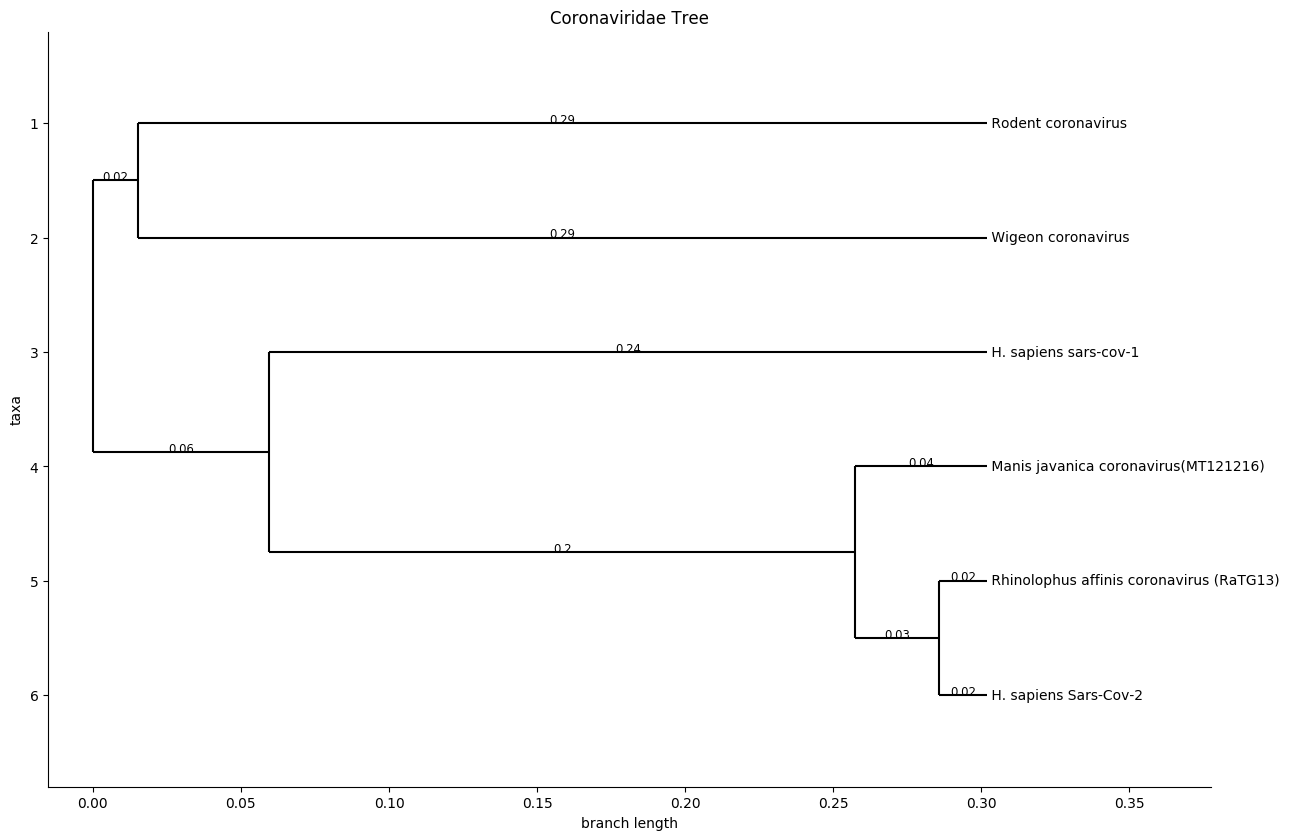

In [62]:
code=lst_id
host=lst_sp


def get_label(leaf):
    #code=['JQ065048', 'MN996528', 'NC_034972', 'NC_019843', 'KX389094', 'MG772934', 'MT084071']
    #host=['Wigeon', 'H. Sapiens, COVID-19', 'Rodent', 'H. Sapiens, MERS', 'Red junglefowl', 'Horseshoe bat', 'Pangolin']
    
    if leaf.name.startswith('Inner'):
        name=''
        return name
    else:
        
        for i in range(0, len(code)):
            if leaf.name.startswith(code[i]):
                name=host[i]
                return name
            
            #return ''
        #name=leaf.name

    #return name


print('\nDistance Matrix:\n-----------------------')
print(dm)

# Phylogenetic tree using UPGMA algorithm
constructor = DistanceTreeConstructor()
tree = constructor.upgma(dm) # We color the human strain, SARS and SARS-CoV-2 in blue
#tree.clade[1, 1, 0].color = "black"
#mrca = tree.common_ancestor({'name':  'MG772934'}, {'name': 'MN996528'})
#mrca.color = "red"

fig = plt.figure(figsize=(15, 10), dpi=100)

axes = fig.add_subplot(1, 1, 1)
#Phylo.draw(tree, axes=axes)
Phylo.draw(tree, axes=axes, label_func=get_label, branch_labels=lambda c: round(c.branch_length, 2), do_show=False)
plt.title('Coronaviridae Tree')
#fig.patch.set_visible(False)
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)

plt.savefig('tree2.png')

print('\nPhylogenetic Tree:\n-----------------------')
#Phylo.draw_ascii(tree)

## Percent nucleotide simmilarity between RaTG13 and Sars-Cov-2
<br>
<br>

In [63]:
from Bio import pairwise2 as pw2
id1='MN908947' ## Ref sequence Sars-cov-2
id2='MN996532' ## RaTG13: closest known sequence

handle = Entrez.efetch(db='nucleotide', id=id1, rettype='gb')
record = SeqIO.read(handle, "genbank")
first_seq=str(record.seq)
handle.close()

handle = Entrez.efetch(db='nucleotide', id=id2, rettype='gb')
record = SeqIO.read(handle, "genbank")
second_seq = str(record.seq)
handle.close()

global_align = pw2.align.globalxx(first_seq, second_seq)


seq_length = min(len(first_seq), len(second_seq))
matches = global_align[0][2]

#print(global_align[0])
percent_match = (matches / seq_length) * 100
print(percent_match)

96.30212694691006


In [65]:
seq_length = max(len(first_seq), len(second_seq))
matches = global_align[0][2]

#print(global_align[0])
percent_match = (matches / seq_length) * 100
print(percent_match)

96.14754372470989
